In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

### Train data

In [3]:
train = pd.read_csv('../../ml-data/cyberattack_detection/3_selected_features_first_version/A1_train_data_VT.csv', sep=',')

In [4]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(train.values)

KMeans(n_clusters=3, random_state=0)

### Test data

In [5]:
test = pd.read_csv('../../ml-data/cyberattack_detection/3_selected_features_first_version/A1_test_data_VT.csv', sep=',')

In [6]:
test_predict = kmeans.predict(test)

In [7]:
test['cluster'] = test_predict
test['cluster'].value_counts()

0    1048135
1       5705
2          5
Name: cluster, dtype: int64

In [8]:
test.columns

Index(['Duration', 'TotalPackets', 'TotalBytes', 'SourceBytes', 'Protocol_tcp',
       'Protocol_udp', 'Direction_->', 'Direction_<->', 'DestTypeService_-1.0',
       'DestTypeService_0.0', 'cluster'],
      dtype='object')

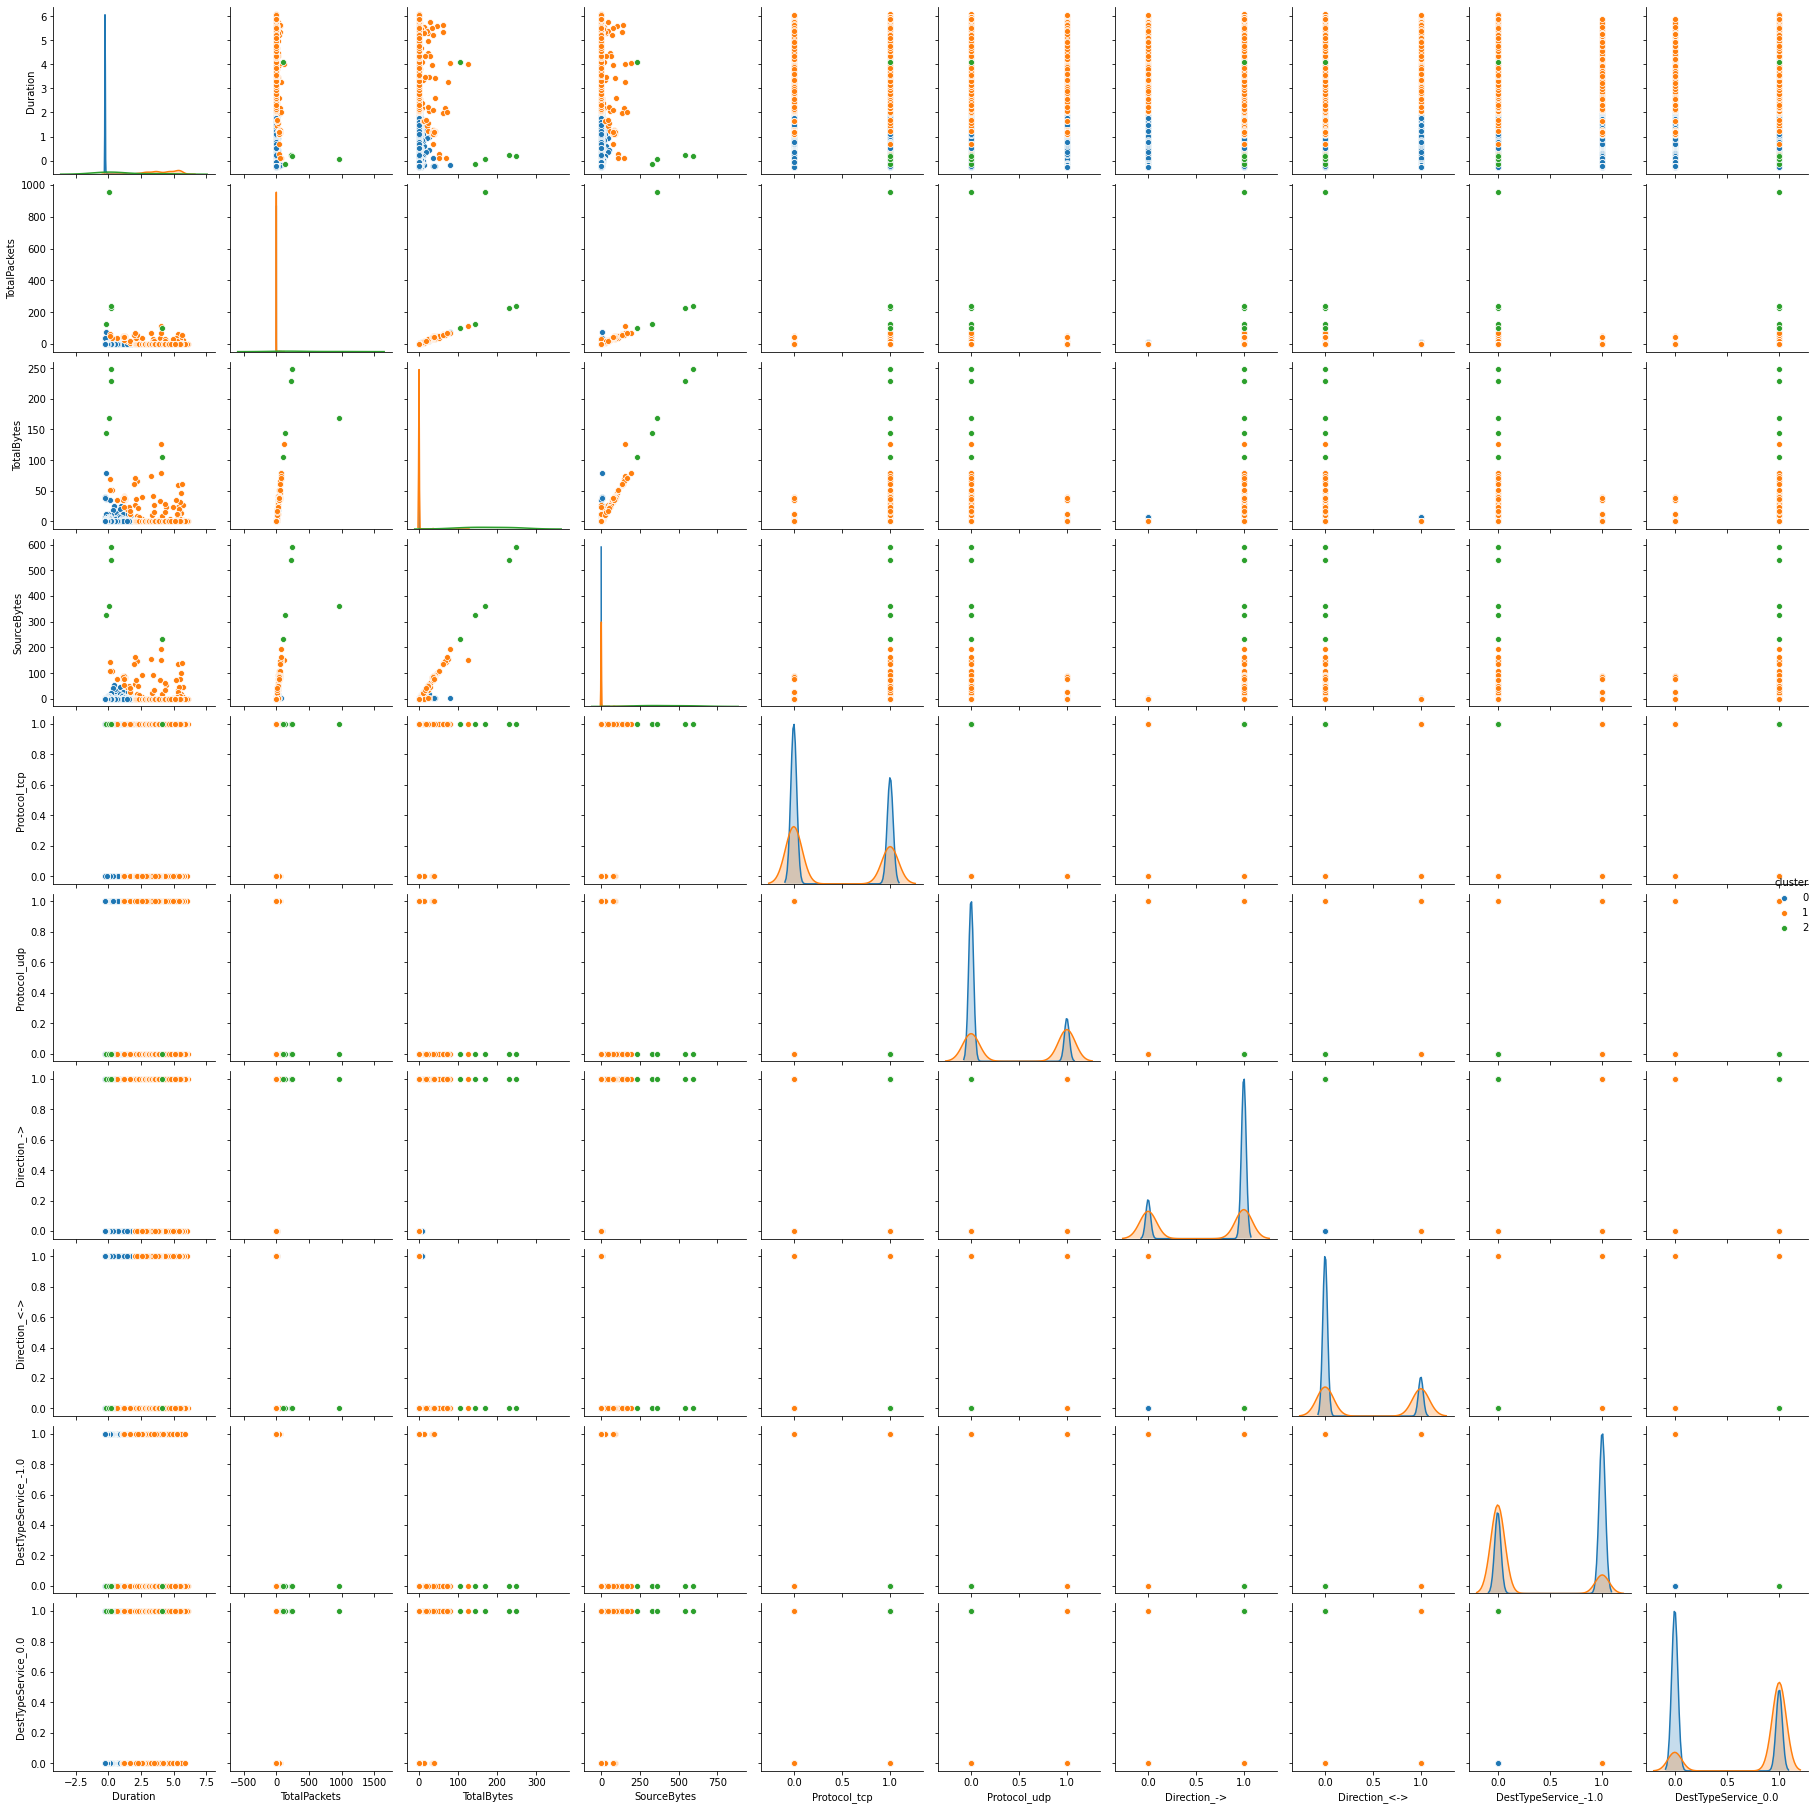

In [20]:
sns.pairplot(test, hue = 'cluster')

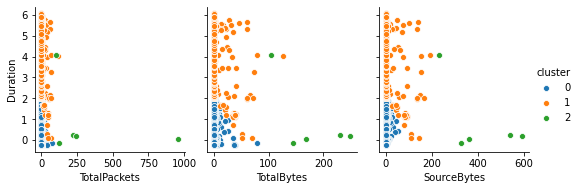

In [21]:
sns.pairplot(
    test, hue = 'cluster',
    y_vars=["Duration"],
    x_vars=["TotalPackets", "TotalBytes", "SourceBytes"],
)

In [9]:
test.shape

(1053845, 11)

In [10]:
original_test = pd.read_csv('../../ml-data/cyberattack_detection/1_raw_data/A2_1/clean_test_data', sep=',')

/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (4,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [11]:
original_test.shape

(1053845, 17)

In [12]:
original_test['cluster'] = test_predict

In [13]:
original_test.head()

,Timestamp,Duration,Protocol,SrcIPAddress,SrcPort,Direction,DestIPAddress,DestPort,State,SrcTypeService,DestTypeService,TotalPackets,TotalBytes,SourceBytes,PacketsSec,TotalBytesSec,SourceBytesSec,cluster
0,2012/12/01 03:36:40.878146,3709.429059,tcp,138.11.74.16,6667,->,201.30.94.155,1027,PA_PA,0.0,0.0,84,6191,3951,0.022645,1.668990,1.065123,1
1,2012/12/01 03:51:49.918983,3309.740162,tcp,138.11.74.16,6667,->,201.30.94.155,1027,PA_PA,0.0,0.0,77,6082,3959,0.023265,1.837606,1.196166,1
2,2012/12/01 04:07:21.899558,3432.626766,tcp,138.11.74.16,6667,->,201.30.94.155,1027,PA_PA,0.0,0.0,85,6225,3813,0.024762,1.813480,1.110811,1
3,2012/12/01 04:38:46.872983,3570.183838,tcp,138.11.74.16,6667,->,201.30.94.155,1027,PA_PA,0.0,0.0,94,7579,4131,0.026329,2.122860,1.157083,1
4,2012/12/01 04:53:55.866280,3397.426792,tcp,138.11.74.16,6667,->,201.30.94.155,1027,PA_PA,0.0,0.0,79,6182,3610,0.023253,1.819612,1.062569,1


In [14]:
anomalies_orig_feat = original_test.loc[original_test['cluster'].isin([1,2])]

In [15]:
anomalies_orig_feat['cluster'].value_counts()

1    5705
2       5
Name: cluster, dtype: int64

In [16]:
anomalies_orig_feat['SrcIPAddress'].nunique()

182

In [17]:
import numpy as np
anomalies_orig_feat.loc[anomalies_orig_feat['PacketsSec'] != np.inf].describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,Duration,SrcTypeService,DestTypeService,TotalPackets,TotalBytes,SourceBytes,PacketsSec,TotalBytesSec,SourceBytesSec,cluster
count,5710,5667,4721,5710,5710,5710,5710,5710,5710,5710
mean,2779.78,0,0,3395.23,2.59111e+06,2.4349e+06,8.0801,5381.38,5267.56,1.00088
std,662.221,0,0,55600.6,2.76964e+07,2.70062e+07,279.486,150694,149303,0.0295811
min,56.1555,0,0,2,155,114,0.000707076,0.0508296,0.0340828,1
25%,2270.94,0,0,7,497,258,0.00274278,0.211897,0.115391,1
50%,2884.27,0,0,11,1146.5,702,0.00417312,0.442887,0.291068,1
75%,3390.65,0,0,25,3075,2234.75,0.00814335,1.06789,0.762519,1
max,3925.12,0,0,3.68056e+06,9.45069e+08,9.83047e+08,18699.5,9.76429e+06,9.65881e+06,2


In [18]:
anomalies_orig_feat.to_csv('../4 Results/A1_test_KMean_VT_orig_feat.csv', sep=',')

End